In [2]:
pip install openpyxl

     |████████████████████████████████| 243 kB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


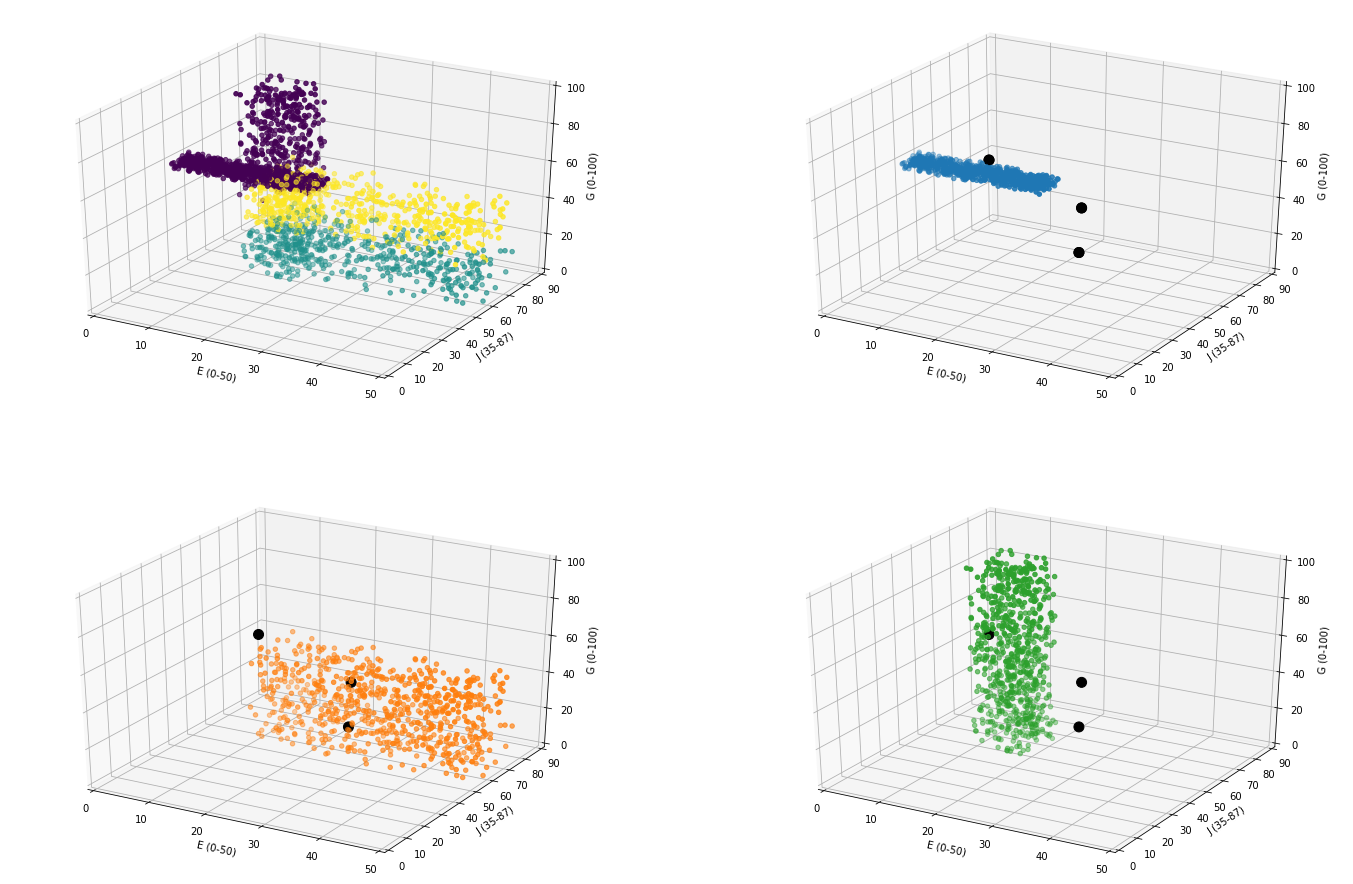

In [7]:
import sklearn.cluster as cluster
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

def fit_cluster(clusters_quantity: int, points: list):
    kmeans_cluster = cluster.KMeans(clusters_quantity)
    kmeans_cluster.fit(points)

    return kmeans_cluster


def read_dataset(name: str) -> DataFrame:
    return pd.read_excel(name)


def get_filtered_dataset(name: str, query: str, columns) -> DataFrame:
    dataset = read_dataset(name).query(query)
    return DataFrame(dataset, columns=columns)


def get_column_from_dataset(dataset, column_name):
    return dataset[column_name].to_numpy()


def set_labels(axis):
    axis.set_xlabel('{X}'.format(X='E (0-50)'))
    axis.set_ylabel('{Y}'.format(Y='J (35-87)'))
    axis.set_zlabel('{Z}'.format(Z='G (0-100)'))


def set_limits(axis):
    axis.set_xlim([0, 50])
    axis.set_ylim([0, 90])
    axis.set_zlim([0, 100])


def render_single_3d_scatter(axis, criteria_1, criteria_2, criteria_3, colors):
    axis.scatter(criteria_1, criteria_2, criteria_3,
                 c=colors, cmap='viridis')
    set_labels(axis)
    set_limits(axis)


def render_3d_scatter(axis, dataset, colors):
    column_E = get_column_from_dataset(dataset, 'E (0-50)')
    column_J = get_column_from_dataset(dataset, 'J (35-87)')
    column_D = get_column_from_dataset(dataset, 'G (0-100)')

    return render_single_3d_scatter(axis, column_E, column_J, column_D, colors)


def render_centroids(axis, centroids):
    set_limits(axis)
    axis.scatter(centroids[:, 0], centroids[:, 1],
                 centroids[:, 2], c='black', s=100, alpha=1)


def render_3d_scatter_from_dataset(dataset, cluster_prediction, cluster_centroids):
    fig, ((cluster_axis, class_1_axis), (class_2_axis, class_3_axis)) = plt.subplots(
        2, 2, subplot_kw=dict(projection='3d'))
    
    fig.set_figheight(16)
    fig.set_figwidth(24)
    
    class_1_dataset = get_filtered_dataset(
        './data/dataset.xlsx', 'Name == "Choluteco"', ['E (0-50)', 'J (35-87)', 'G (0-100)'])
    class_2_dataset = get_filtered_dataset(
        './data/dataset.xlsx', 'Name == "Dum"', ['E (0-50)', 'J (35-87)', 'G (0-100)'])
    class_3_dataset = get_filtered_dataset(
        './data/dataset.xlsx', 'Name == "Albukerke"', ['E (0-50)', 'J (35-87)', 'G (0-100)'])

    render_3d_scatter(cluster_axis, dataset, cluster_prediction)
    render_centroids(class_1_axis, cluster_centroids)

    render_3d_scatter(class_1_axis, class_1_dataset, '#1f77b4')
    render_centroids(class_1_axis, cluster_centroids)

    render_3d_scatter(class_2_axis, class_2_dataset, '#ff7f0e')
    render_centroids(class_2_axis, cluster_centroids)

    render_3d_scatter(class_3_axis, class_3_dataset, '#2ca02c')
    render_centroids(class_3_axis, cluster_centroids)

    return plt.show()

dataset = get_filtered_dataset('./data/dataset.xlsx','Name == "Choluteco" | Name == "Dum" | Name == "Albukerke"',['E (0-50)', 'J (35-87)', 'G (0-100)'])
points = dataset.to_numpy()
cluster = fit_cluster(3, points)
render_3d_scatter_from_dataset(dataset, cluster.predict(points), cluster.cluster_centers_)